In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# **Анализ датасета**



In [6]:
df = pd.read_csv('../data/regression/villa_prices.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                1417 non-null   float64
 1   neighborhood_name    1417 non-null   object 
 2   administritive_area  1396 non-null   object 
 3   city                 1417 non-null   object 
 4   rooms                1417 non-null   int64  
 5   bathrooms            1417 non-null   int64  
 6   sqm                  1417 non-null   float64
 7   elevator             1417 non-null   int64  
 8   bool                 1417 non-null   int64  
 9   driver               1417 non-null   int64  
 10  garden               1417 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 121.9+ KB


In [7]:
df.isnull().sum()

price                   0
neighborhood_name       0
administritive_area    21
city                    0
rooms                   0
bathrooms               0
sqm                     0
elevator                0
bool                    0
driver                  0
garden                  0
dtype: int64

In [8]:
df['administritive_area'].unique()

array(['Riyadh', 'Makkah', nan], dtype=object)

# **Предобработка**


---



## *Пропуски:*



> Пропуски имеются только у одного признака с типом данных *string*. Учитывая
тот факт, что пропусков 21, а уникальных значений этого признака всего 2. То можно без вреда для дальнейшего обучения выбросить строки с этими пропусками.

In [9]:
df = df.dropna()
df.isnull().sum()

price                  0
neighborhood_name      0
administritive_area    0
city                   0
rooms                  0
bathrooms              0
sqm                    0
elevator               0
bool                   0
driver                 0
garden                 0
dtype: int64

In [10]:
df.head(10)

price neighborhood_name administritive_area  ... bool  driver  garden
0  1300000.0       Al Munsiyah              Riyadh  ...    0       0       0
1  2500000.0         Al Murjan              Makkah  ...    1       0       0
2  1300000.0          Ar Rimal              Riyadh  ...    0       0       0
3  1550000.0        Az Zomorod              Makkah  ...    0       0       0
4  1000000.0         Ash Shifa              Riyadh  ...    0       0       0
5  2200000.0           An Naim              Makkah  ...    0       0       1
6  2500000.0         An Nahdah              Makkah  ...    1       0       0
7  2000000.0         Al Yasmin              Riyadh  ...    0       0       0
8   950000.0         Ar Riyadh              Makkah  ...    0       0       0
9   950000.0         Ar Riyadh              Makkah  ...    0       0       0

[10 rows x 11 columns]

## *One-hot coding*

> Перекодируем 3 признака:
> *   City
> *   Administritive_area
> *   Neighborhood_name





In [11]:
df = pd.get_dummies(df, prefix=['city'], columns=['city'])

In [12]:
df = pd.get_dummies(df, prefix=['admin_area'], columns=['administritive_area'])

In [13]:
df = pd.get_dummies(df, prefix=['neighborhood'], columns=['neighborhood_name'])

In [14]:
df.head(10)

price  rooms  ...  neighborhood_Uhud  neighborhood_Uqaz
0  1300000.0      4  ...                  0                  0
1  2500000.0      5  ...                  0                  0
2  1300000.0      5  ...                  0                  0
3  1550000.0      6  ...                  0                  0
4  1000000.0      4  ...                  0                  0
5  2200000.0      5  ...                  0                  0
6  2500000.0      5  ...                  0                  0
7  2000000.0      5  ...                  0                  0
8   950000.0      3  ...                  0                  0
9   950000.0      3  ...                  0                  0

[10 rows x 135 columns]

## *Названия столбцов*



> В названии двух признаков опечатка: вместо pool - bool (бинарный признак показывающий, имеется ли бассейн).

> Вместо administrAtive_area: administrItive_area. Но это уже было исправлено путем добавления префикса во время перекодирования.



In [71]:
df = df.rename(columns={'bool' : 'pool', })
df.head(10)

price  rooms  ...  neighborhood_Uhud  neighborhood_Uqaz
0  1300000.0      4  ...                  0                  0
1  2500000.0      5  ...                  0                  0
2  1300000.0      5  ...                  0                  0
3  1550000.0      6  ...                  0                  0
4  1000000.0      4  ...                  0                  0
5  2200000.0      5  ...                  0                  0
6  2500000.0      5  ...                  0                  0
7  2000000.0      5  ...                  0                  0
8   950000.0      3  ...                  0                  0
9   950000.0      3  ...                  0                  0

[10 rows x 135 columns]

# **Визуализация**

In [ ]:
sns.pairplot(shuffle(df),
              x_vars = ['sqm'],
              y_vars = 'price',
              kind='reg',
              markers='.')

Зависимость цены от кв.м довольно очевидна.

In [ ]:
sns.barplot(x="rooms", y="price", data=df)

Зависимость цены от кол-ва комнат, также очевидна. Но не совсем пропорциональная ввиду разного количества данных на каждую комнату.

27

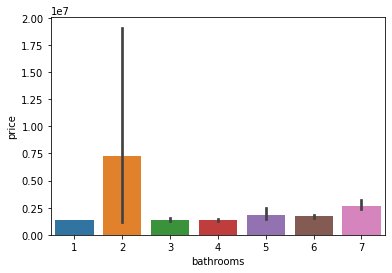

In [ ]:
sns.barplot(x="bathrooms", y="price", data=df)
(df['bathrooms'] == 2).sum()

1

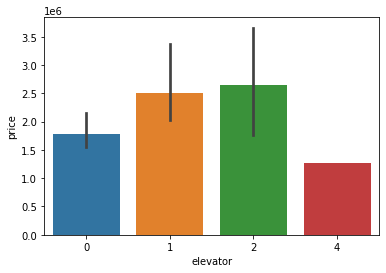

In [ ]:
sns.barplot(x="elevator", y="price", data=df)
(df['elevator'] == 4).sum()

Данные графики также отражают зависимость цены от кол-ва лифтов и ванных комнат. Чем больше лифтов - тем выше цена. Аналогично и с ванными комнатами. 
Вполне возможно, что это лишь следствие из зависимости от кол-ва комнат и площади, о которой говорилось ранее. (Чем больше комнат и площадь, тем больше будет ванных и лифтов)

In [ ]:
sns.barplot(x="admin_area_Makkah", y="price", data=df)

In [ ]:
Из этого графика отчетливо видно, что в административном регионе Makkah цена аппартаментов выше.